# The Battle of the Neighborhoods - Porto Alegre/RS - Brazil
## Capstone Project
#### Applied Data Science Capstone - IBM/Coursera

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Conclusion](#conclusion)

## 1. Introduction <a name='introduction' ></a>

Porto Alegre is the capital of the southernmost state of Brazil, Rio Grande do Sul. In Porto Alegre, approximately 1.5 million people live in an area of 496,682 km². The city was formed from the arrival of Azorean couples in the middle of the 18th century. Around the 19th century, the city received many German and Italian immigrants, as well as Spaniards, Africans, Poles and Lebanese.

In Porto Alegre, approximately 37% of people live in apartments. The city suffers from problems such as sub habitation, high cost of living and traffic jams. On the other hand, the city also stands out for being one of the best cities in Brazil to live, work, study and have fun.

If someone were planning to move to Porto Alegre, it would be very useful to know which neighborhoods to consider when choosing a home. Those looking for housing do this type of neighborhood categorization intuitively. It would be much easier just by using demographic density, average income per housing and facilities in the neighborhoods, and then grouping them. Grouping the neighborhoods would greatly reduce the effort to find housing for a newcomer who does not know the city.

## 2. Data <a name='data' ></a>

Three data sources will be used, as follows:

* Wikipedia for data on population density and average income per housing in each neighborhood
* Foursquare API to get the most common venues of given neighborhood of Porto Alegre
* File downloaded from the Porto Alegre Observa POA website with the Porto Alegre neighborhoods area, in shp format

With these data, it is intended to group the districts of Porto Alegre by similarity, identifying each group by its characteristics.

### 2.1 Porto Alegre Neighborhoods Data 

In this section, we are going to take some data of Porto Alegre neighbourhoods, such as demografic density and average income per household.

> Source: https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Porto_Alegre

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Porto_Alegre'

In [3]:
neigh_raw_data = pd.read_html(url)[0] #the first website table

In [4]:
neigh_raw_data.head()

,Bairro,Data de Criação,Área,População2010,Tx Cresc Pop 91-00,Densidade,Renda média por domicílio,Nota
0,Aberta dos Morros,21 dez 2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Agronomia,21 set 1976,1241 ha,12222.0,"19,24% a.a.","8,6 hab/ha","3,98 SM/mês",(1)
2,Anchieta,7 dez 1959,84 ha,203.0,"0,51% a.a.","2,4 hab/ha","8,41 SM/mês",NaN
3,Arquipélago,7 dez 1959,4718 ha,5061.0,"9,32% a.a.","1,1 hab/ha","2,96 SM/mês",NaN
4,Auxiliadora,7 dez 1959,82 ha,9985.0,"-0,25% a.a.","121,8 hab/ha","19,57 SM/mês",NaN


It is necessary to drop some columns and translate the labels from portuguese to english.

In [5]:
neigh_data = neigh_raw_data.drop(['Data de Criação','Área', 'População2010',
                                  'Tx Cresc Pop 91-00','Nota'],axis=1)

In [6]:
neigh_data.rename(columns={"Bairro": "Neighborhood", 
                           "Densidade": "Population density (hab/ha)",
                          'Renda média por domicílio': 'Average income per household (1000 R$/month)'},
                 inplace=True)

In [7]:
neigh_data['Neighborhood']

0     Aberta dos Morros
1             Agronomia
2              Anchieta
3           Arquipélago
4           Auxiliadora
            ...        
81          Vila Jardim
82     Vila João Pessoa
83            Vila Nova
84      Zona Indefinida
85                TOTAL
Name: Neighborhood, Length: 86, dtype: object

In [8]:
neigh_data.drop(79,inplace=True)

We are going to drop rows that has no information about Population Density or Average income per household.

In [9]:
neigh_data.dropna(inplace=True)

In [10]:
neigh_data.reset_index(inplace=True,drop=True)

In [11]:
neigh_data

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month)
0,Agronomia,"8,6 hab/ha","3,98 SM/mês"
1,Anchieta,"2,4 hab/ha","8,41 SM/mês"
2,Arquipélago,"1,1 hab/ha","2,96 SM/mês"
3,Auxiliadora,"121,8 hab/ha","19,57 SM/mês"
4,Azenha,"106,7 hab/ha","10,73 SM/mês"
...,...,...,...
74,Vila Ipiranga,"40,3 hab/ha","8,99 SM/mês"
75,Vila Jardim,"80,1 hab/ha","5,30 SM/mês"
76,Vila João Pessoa,"125,3 hab/ha","5,58 SM/mês"
77,Vila Nova,"32,1 hab/ha","5,35 SM/mês"


Since labels already indicates the units of measurement of 'Population Density' and 'Average income per household' labels, we have to get rid of the units of measurement from those columns. After that, it is also necessary to substitute commas for dots.

In [12]:
for i in neigh_data.index:
    neigh_data.iloc[i,1] = str(neigh_data.iloc[i,1])[0:-7].replace(',','.')
    neigh_data.iloc[i,2] = str(neigh_data.iloc[i,2])[0:-7].replace(',','.')

Finally, let's convert data from string to float.

In [13]:
neigh_data['Population density (hab/ha)'] = neigh_data['Population density (hab/ha)'].astype('float')
neigh_data['Average income per household (1000 R$/month)'] = neigh_data['Average income per household (1000 R$/month)'].astype('float')

In [14]:
neigh_data.dtypes

Neighborhood                                     object
Population density (hab/ha)                     float64
Average income per household (1000 R$/month)    float64
dtype: object

In [15]:
neigh_data.head()

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month)
0,Agronomia,8.6,3.98
1,Anchieta,2.4,8.41
2,Arquipélago,1.1,2.96
3,Auxiliadora,121.8,19.57
4,Azenha,106.7,10.73


### 2.2 Porto Alegre Neighborhoods Coordinates

In [16]:
import geopandas
import folium
from geopy.geocoders import Nominatim
from descartes.patch import PolygonPatch
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import mapclassify
import selenium

After importing some libraries, we are going to use neigh_data dataframe to find the coordinates of all neighborhoods in it.

In [17]:
neigh_data_coord = neigh_data.copy()

In [18]:
neigh_data_coord.head()

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month)
0,Agronomia,8.6,3.98
1,Anchieta,2.4,8.41
2,Arquipélago,1.1,2.96
3,Auxiliadora,121.8,19.57
4,Azenha,106.7,10.73


Creating two functions to get coordinates for every neighborhood in Porto Alegre.

In [19]:
def get_latitude (name):
        geolocator = Nominatim(user_agent="poa_explorer")
        neighborhood = f'{name}, Porto Alegre, Brazil'
        location = geolocator.geocode(neighborhood)
        latitude = location.latitude
        
        return latitude

In [20]:
def get_longitude (name):
        geolocator = Nominatim(user_agent="poa_explorer")
        neighborhood = f'{name}, Porto Alegre, Brazil'
        location = geolocator.geocode(neighborhood)
        longitude = location.longitude
        
        return longitude

Now, I am going to apply both functions to the 'Neighborhood' column, creating at the same time two new columns to record latitude and longitude.

In [21]:
neigh_data_coord['Latitude'] = neigh_data_coord['Neighborhood'].apply(get_latitude)
neigh_data_coord['Longitude'] = neigh_data_coord['Neighborhood'].apply(get_longitude)

In [22]:
neigh_data_coord.shape

(79, 5)

In [23]:
neigh_data_coord['Neighborhood'] = neigh_data_coord['Neighborhood'].str.upper()

In [24]:
neigh_data_coord.head()

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude
0,AGRONOMIA,8.6,3.98,-30.069267,-51.149217
1,ANCHIETA,2.4,8.41,-29.972936,-51.173802
2,ARQUIPÉLAGO,1.1,2.96,-29.992760,-51.226618
3,AUXILIADORA,121.8,19.57,-30.020011,-51.190588
4,AZENHA,106.7,10.73,-30.050721,-51.215607


In [25]:
neigh_data_coord.shape

(79, 5)

We also need to get Porto Alegre city coordinates.

In [26]:
poa = 'Porto Alegre, Brazil'
geolocator = Nominatim(user_agent="poa_explorer")
poa_loc = geolocator.geocode(poa)
poa_lng = poa_loc.longitude
poa_ltd = poa_loc.latitude
print('The geograpical coordinate of Porto Alegre City, in Brazil, are {}, {}.'.format(poa_ltd, poa_lng))

The geograpical coordinate of Porto Alegre City, in Brazil, are -30.0324999, -51.2303767.


Finally in this section, let's put on Porto Alegre's map all its neighborhoods.

In [27]:
# create map of Porto Alegre using latitude and longitude values
map_poa = folium.Map(location=[poa_ltd, poa_lng], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neigh_data_coord['Latitude'], neigh_data_coord['Longitude'], 
                                  neigh_data_coord['Neighborhood']):
    label = f'{neighborhood}'
    label = folium.Popup(label, parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_poa)

map_poa

It seems that São José Neighborhood has wrong coordinates. Let's fix this.

In [28]:
neigh_data_coord[neigh_data_coord['Neighborhood']=='SÃO JOSÉ']

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude
66,SÃO JOSÉ,136.6,3.6,-29.812089,-51.144559


In [29]:
#Coordinates from Google Maps, considering somewhere centered in the São José Neighborhood
neigh_data_coord.loc[66,'Latitude'] = -30.071672
neigh_data_coord.loc[66,'Longitude'] = -51.164104

In [30]:
neigh_data_coord[neigh_data_coord['Neighborhood']=='SÃO JOSÉ']

,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude
66,SÃO JOSÉ,136.6,3.6,-30.071672,-51.164104


In [31]:
neigh_data_coord.shape

(79, 5)

In [32]:
# create map of Porto Alegre using latitude and longitude values
map_poa = folium.Map(location=[poa_ltd, poa_lng], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(neigh_data_coord['Latitude'], neigh_data_coord['Longitude'], 
                                  neigh_data_coord['Neighborhood']):
    label = f'{neighborhood}'
    label = folium.Popup(label, parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_poa)  
    
map_poa

Now, let's get data of neighborhoods areas.

In [33]:
neigh_area = geopandas.read_file('Bairros_2016.shp')

In [34]:
neigh_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    94 non-null     int64   
 1   CODIGO      94 non-null     int64   
 2   EDITOR      0 non-null      object  
 3   DATA_EDICA  94 non-null     object  
 4   NOME        94 non-null     object  
 5   geometry    94 non-null     geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 4.5+ KB


In [35]:
neigh_area.head()

,OBJECTID,CODIGO,EDITOR,DATA_EDICA,NOME,geometry
0,0,0,None,1899-12-30,LAMI,"POLYGON ((291163.025 1656544.013, 291173.664 1..."
1,0,0,None,1899-12-30,BOA VISTA DO SUL,"MULTIPOLYGON (((284220.343 1650812.330, 284221..."
2,0,0,None,1899-12-30,EXTREMA,"POLYGON ((294981.188 1654438.415, 294972.136 1..."
3,0,0,None,1899-12-30,BELÉM NOVO,"POLYGON ((284657.457 1658914.972, 284650.143 1..."
4,0,0,None,1899-12-30,SÃO CAETANO,"POLYGON ((294834.673 1658905.795, 294754.377 1..."


In [36]:
neigh_area.rename(columns={'NOME':'Neighborhood'},inplace=True)

In [37]:
neigh_area.columns

Index(['OBJECTID', 'CODIGO', 'EDITOR', 'DATA_EDICA', 'Neighborhood',
       'geometry'],
      dtype='object')

In [38]:
neigh_area.drop(labels=['OBJECTID', 'CODIGO', 'EDITOR', 'DATA_EDICA'],axis=1,inplace=True)

In [39]:
neigh_area.head()

,Neighborhood,geometry
0,LAMI,"POLYGON ((291163.025 1656544.013, 291173.664 1..."
1,BOA VISTA DO SUL,"MULTIPOLYGON (((284220.343 1650812.330, 284221..."
2,EXTREMA,"POLYGON ((294981.188 1654438.415, 294972.136 1..."
3,BELÉM NOVO,"POLYGON ((284657.457 1658914.972, 284650.143 1..."
4,SÃO CAETANO,"POLYGON ((294834.673 1658905.795, 294754.377 1..."


In [40]:
neigh_area_coord = pd.merge(neigh_area,neigh_data_coord,on='Neighborhood',how='left')

In [41]:
neigh_area_coord.shape

(94, 6)

In [42]:
neigh_area_coord.head()

,Neighborhood,geometry,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude
0,LAMI,"POLYGON ((291163.025 1656544.013, 291173.664 1...",1.1,4.04,-30.238824,-51.083956
1,BOA VISTA DO SUL,"MULTIPOLYGON (((284220.343 1650812.330, 284221...",NaN,NaN,NaN,NaN
2,EXTREMA,"POLYGON ((294981.188 1654438.415, 294972.136 1...",NaN,NaN,NaN,NaN
3,BELÉM NOVO,"POLYGON ((284657.457 1658914.972, 284650.143 1...",4.7,4.49,-30.210898,-51.179565
4,SÃO CAETANO,"POLYGON ((294834.673 1658905.795, 294754.377 1...",NaN,NaN,NaN,NaN


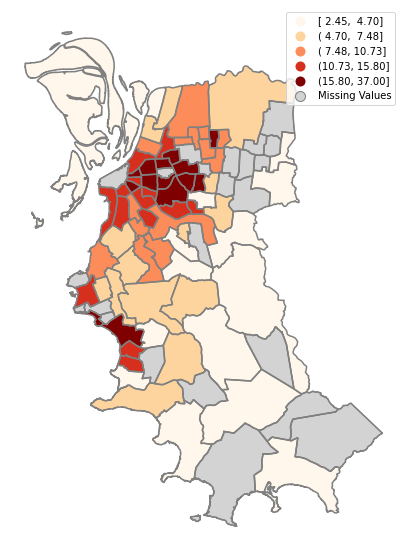

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')
ax.axis('off')

neigh_area_coord.plot(
    ax=ax, 
    column='Average income per household (1000 R$/month)', 
    legend=True, 
    cmap='OrRd',
    k=5,
    #legend_kwds={
    #    'label':'Population density (hab/ha)', 
    #},
    scheme='quantiles',
    missing_kwds={
        'color': 'lightgray',
        'label': 'Missing Values',
        'edgecolor': 'grey',
        #'hatch': '///'
    }
)
neigh_area_coord.boundary.plot(ax=ax,color='grey')

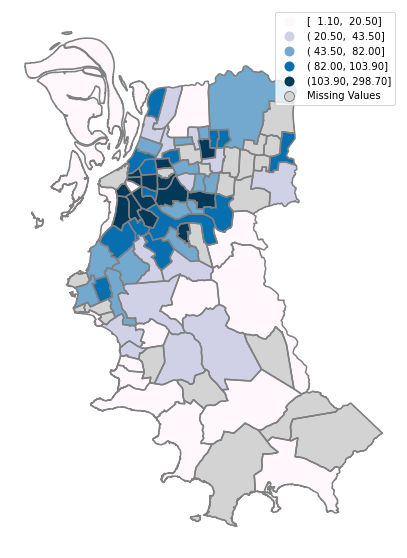

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')
ax.axis('off')

neigh_area_coord.plot(
    ax=ax, 
    column='Population density (hab/ha)', 
    legend=True, 
    cmap='PuBu',
    k=5,
    #legend_kwds={
    #    'label':'Population density (hab/ha)', 
    #},
    scheme='quantiles',
    missing_kwds={
        'color': 'lightgray',
        'label': 'Missing Values',
        'edgecolor': 'grey',
        #'hatch': '///'
    }
)
neigh_area_coord.boundary.plot(ax=ax,color='grey')

### 2.2 Neighborhoods Venues from Foursquare

First of all, I am going to define the credentials to access Foursquare API. 

In [45]:
CLIENT_ID = 'UVQYTO1U3J0FFQAHZIVP2ZXP5M3EYSCVPOMOEXYQ0DL1XDRK' # your Foursquare ID
CLIENT_SECRET = 'AQL0YLQ3WQAHQPIDNWXPC1EEJ5QW5C0Z3ZQG4U4DGRIASYZY' # your Foursquare Secret
VERSION = '20200605'
user_id = '484542633' # user ID with most agree counts and complete profile
ACCESS_TOKEN = 'ASL32RO3U1LMEYZAXWNLVIL53CQ5T44UQEUCCT0RBV0QGSNG'

LIMIT = 200 
radius = 500 #500 mts from a neighborhood coordinates

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: UVQYTO1U3J0FFQAHZIVP2ZXP5M3EYSCVPOMOEXYQ0DL1XDRK
CLIENT_SECRET:AQL0YLQ3WQAHQPIDNWXPC1EEJ5QW5C0Z3ZQG4U4DGRIASYZY


I am goingo to use Foursquare Python Library, which can be found in https://pypi.org/project/foursquare/.

In [46]:
import foursquare

In [47]:
client = foursquare.Foursquare(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,version=VERSION)
client.set_access_token(ACCESS_TOKEN) 

Now I am going to use the function created in Manhattan Notebook.

In [48]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # make the request
        results = client.venues.explore(params={
                                        'll':f'{lat},{lng}',
                                        'radius':radius,
                                        'limit':LIMIT
                                        #'categoryId':'52f2ab2ebcbc57f1066b8b46,5745c2e4498e11e7bccabdbd,4bf58dd8d48988d16b941735,4d4b7105d754a06377d81259'
                                        })['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let's write the code to run the above function on each neighborhood and create a new dataframe called *poa_venues*.

In [49]:
poa_venues = getNearbyVenues(names=neigh_data_coord['Neighborhood'],
                             latitudes=neigh_data_coord['Latitude'],
                             longitudes=neigh_data_coord['Longitude']
                             )

Let's check some information about *poa_venues*.

In [50]:
print(poa_venues.shape)
poa_venues.head()

(2497, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AGRONOMIA,-30.069267,-51.149217,Motel Cozumel,-30.069310,-51.144245,Motel
1,AGRONOMIA,-30.069267,-51.149217,Caçula Centermat,-30.065606,-51.151882,Construction & Landscaping
2,AGRONOMIA,-30.069267,-51.149217,Estação Antônio de Carvalho,-30.067750,-51.147337,Bus Stop
3,AGRONOMIA,-30.069267,-51.149217,Agropecuária Querência,-30.066995,-51.149977,Pet Service
4,AGRONOMIA,-30.069267,-51.149217,Corredor da Bento Gonçalves,-30.066692,-51.149813,Bus Station


In [51]:
poa_venues.groupby(by='Neighborhood').count()['Venue Category']

Neighborhood
AGRONOMIA            7
ANCHIETA             8
ARQUIPÉLAGO          2
AUXILIADORA         91
AZENHA              46
                    ..
VILA ASSUNÇÃO        9
VILA IPIRANGA       37
VILA JARDIM         13
VILA JOÃO PESSOA    20
VILA NOVA            7
Name: Venue Category, Length: 79, dtype: int64

In [52]:
print(f'There are {len(poa_venues["Venue Category"].unique())} unique venues in Porto Alegre')

There are 279 unique venues in Porto Alegre


Let's see if the word Neighborhood appears in Venue Category column:

In [53]:
poa_venues['Venue Category'][poa_venues['Venue Category']=='Neighborhood']

1127    Neighborhood
2143    Neighborhood
Name: Venue Category, dtype: object

As we can see, two neighborhoods have Venues which is classified as 'Neighborhood'. That information is really useless. So, I am going to get rid of this rows.

In [54]:
poa_venues['Venue Category'].drop([1127,2143],inplace=True)

In [55]:
print(f'There are {len(poa_venues["Venue Category"].unique())} unique venues in Porto Alegre')

There are 278 unique venues in Porto Alegre


Now we have to check if there are neighborhoos without any venue, dropping them.

In [56]:
poa_venues.shape

(2497, 7)

## 3. Methodology <a name='methodology' ></a>

As follows:
* Data acquisition: Wikipedia, Porto Alegre neighborhoods geolocation, Foursquare Venues data
* Preparing data for Analysis: data cleaning e neighborhoods geolocation adjustments
* Clustering neighborhoods: clustering neighborhoods by venues, demographic density and average income per household using Kmeans from scikit-learn library
* Analyze clusters, identifying the main characteristics of each cluster, labeling them


### 3.1 Preparing data for Clustering

Now that I have all data I need, I am gointo to generate a DataFrame with the 10 most common venues category of each neighborhood. After that, I will cluster neighborhoods by most common venues, population density and average income per household.

In [57]:
# one hot encoding
poa_onehot = pd.get_dummies(poa_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
poa_onehot['Neighborhood'] = poa_venues['Neighborhood'] 

poa_onehot.head()

,ATM,Acai House,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
poa_onehot.shape

(2497, 279)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [59]:
poa_grouped = poa_onehot.groupby('Neighborhood').mean().reset_index()
poa_grouped

,Neighborhood,ATM,Acai House,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,AGRONOMIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,ANCHIETA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,ARQUIPÉLAGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,AUXILIADORA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010989,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,AZENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.043478,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,VILA ASSUNÇÃO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
75,VILA IPIRANGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
76,VILA JARDIM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
77,VILA JOÃO PESSOA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [60]:
poa_grouped.shape

(79, 279)

First, let's write a function to sort the venues in descending order.

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append(f'{ind+1}{indicators[ind]} Most Common Venue')
    except:
        columns.append(f'{ind+1}th Most Common Venue')

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = poa_grouped['Neighborhood']

for ind in np.arange(poa_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(poa_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRONOMIA,Bus Station,Construction & Landscaping,Motel,Pet Service,Bus Stop,Soccer Field,Food & Drink Shop,Food,Flower Shop,Empada House
1,ANCHIETA,Brewery,Soccer Field,Supermarket,Brazilian Restaurant,Flower Shop,Distribution Center,Arts & Crafts Store,Food & Drink Shop,Farm,Farmers Market
2,ARQUIPÉLAGO,Motel,Restaurant,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop
3,AUXILIADORA,Gym / Fitness Center,Pizza Place,Restaurant,Café,Bar,Bakery,Southern Brazilian Restaurant,Pet Store,Pastelaria,Pharmacy
4,AZENHA,Café,Brazilian Restaurant,Gym / Fitness Center,Women's Store,Motel,Bakery,Dance Studio,Theater,Art Gallery,Restaurant


In [63]:
neighborhoods_venues_sorted.shape

(79, 11)

Now I am going to create a new dataframe with neigh_data_coord dataframe (which has neighborhood data) and neighborhoods_venues_sorted (which has neighborhoods venues data), dropping latitude and longitude columns.

In [64]:
neigh_data_coord_venues = pd.merge(neigh_data_coord,neighborhoods_venues_sorted,on='Neighborhood',how='inner')

In [65]:
neigh_data_coord_venues.shape

(79, 15)

### 3.2 Clustering Neighborhoods

We begin selecting the best number of clusters for K-Means method by using elbow method. To do so, let's use yellowbrick.cluster library.

In [66]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [67]:
poa_grouped_clustering = pd.merge(poa_grouped,neigh_data_coord,on='Neighborhood',how='left')
poa_grouped_clustering.drop(['Latitude','Longitude','Neighborhood'],axis=1,inplace=True)

In [68]:
poa_grouped_clustering.head()

,ATM,Acai House,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Watch Shop,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Population density (hab/ha),Average income per household (1000 R$/month)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,8.6,3.98
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.4,8.41
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.1,2.96
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010989,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,121.8,19.57
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.043478,0.0,106.7,10.73


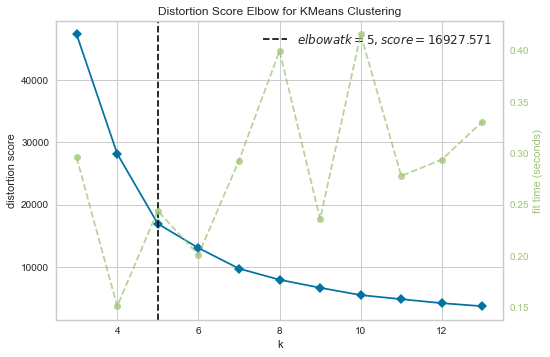

In [69]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,14))
visualizer.fit(poa_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It seems that the ideal number of clusters is 5.

In [70]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(poa_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_.shape

(79,)

Let's add labels to neigh_data_coord_venues dataframe.

In [71]:
neigh_data_coord_venues_labels = neigh_data_coord_venues.copy()

In [72]:
neigh_data_coord_venues_labels.shape

(79, 15)

In [73]:
neigh_data_coord_venues_labels.insert(0,'Cluster Labels',kmeans.labels_)

In [74]:
neigh_data_coord_venues_labels.head()

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,AGRONOMIA,8.6,3.98,-30.069267,-51.149217,Bus Station,Construction & Landscaping,Motel,Pet Service,Bus Stop,Soccer Field,Food & Drink Shop,Food,Flower Shop,Empada House
1,4,ANCHIETA,2.4,8.41,-29.972936,-51.173802,Brewery,Soccer Field,Supermarket,Brazilian Restaurant,Flower Shop,Distribution Center,Arts & Crafts Store,Food & Drink Shop,Farm,Farmers Market
2,4,ARQUIPÉLAGO,1.1,2.96,-29.992760,-51.226618,Motel,Restaurant,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop
3,2,AUXILIADORA,121.8,19.57,-30.020011,-51.190588,Gym / Fitness Center,Pizza Place,Restaurant,Café,Bar,Bakery,Southern Brazilian Restaurant,Pet Store,Pastelaria,Pharmacy
4,1,AZENHA,106.7,10.73,-30.050721,-51.215607,Café,Brazilian Restaurant,Gym / Fitness Center,Women's Store,Motel,Bakery,Dance Studio,Theater,Art Gallery,Restaurant


## 4. Analysis <a name='analysis' ></a>

First, we are going visualize the resulting clusters on a map.

In [75]:
import seaborn as sns

In [76]:
# create map
map_clusters = folium.Map(location=[poa_ltd, poa_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neigh_data_coord_venues_labels['Latitude'], 
                                  neigh_data_coord_venues_labels['Longitude'], 
                                  neigh_data_coord_venues_labels['Neighborhood'], 
                                  neigh_data_coord_venues_labels['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can also create a choropleth map...

In [77]:
neigh_data_area_coord_venues_labels = pd.merge(neigh_area,neigh_data_coord_venues_labels,on='Neighborhood',how='left')

In [78]:
neigh_data_area_coord_venues_labels.shape

(94, 17)

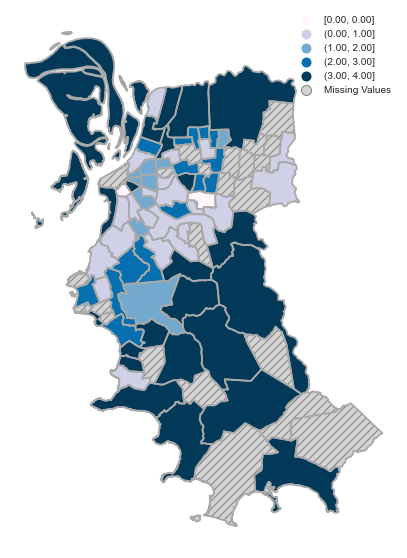

In [79]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')
ax.axis('off')

neigh_data_area_coord_venues_labels.plot(
    ax=ax, 
    column='Cluster Labels', 
    legend=True, 
    cmap='PuBu',
    k=kclusters,
    scheme='FisherJenks',
    missing_kwds={
        'color': 'lightgray',
        'label': 'Missing Values',
        'edgecolor': 'grey',
        'hatch': '///'
    }
)
neigh_data_area_coord_venues_labels.boundary.plot(ax=ax,color='darkgrey')

The number of neighborhoods that each cluster has is shown in the table below.

In [80]:
pd.DataFrame(neigh_data_coord_venues_labels.groupby(by='Cluster Labels').count().loc[0:6, 'Neighborhood'])

,Neighborhood
Cluster Labels,
0,2
1,23
2,10
3,18
4,26


Let's now examine each cluster and determine the discriminating feature that distinguish each cluster. Then, we can assign a name to each cluster.

### 4.1 Population Density and Income per household analysis

Now let's see if the clusters of Porto Alegre neighborhoods have any striking characteristics in terms of population density and income per housing.

Let's add a column to neigh_data_area_coord_venues with total venues in a neighborhood.

In [81]:
total = poa_venues.groupby(by='Neighborhood').count()['Venue Category']

In [82]:
total = pd.DataFrame(total)

In [83]:
total.reset_index(inplace=True)
total.rename(columns={'Venue Category':'Number of Venues'},inplace=True)

In [84]:
neigh_data_coord_venues_labels_total = pd.merge(neigh_data_coord_venues_labels,total,on='Neighborhood',how='left')

In [85]:
neigh_data_coord_venues_labels_total.head()

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
0,4,AGRONOMIA,8.6,3.98,-30.069267,-51.149217,Bus Station,Construction & Landscaping,Motel,Pet Service,Bus Stop,Soccer Field,Food & Drink Shop,Food,Flower Shop,Empada House,7
1,4,ANCHIETA,2.4,8.41,-29.972936,-51.173802,Brewery,Soccer Field,Supermarket,Brazilian Restaurant,Flower Shop,Distribution Center,Arts & Crafts Store,Food & Drink Shop,Farm,Farmers Market,8
2,4,ARQUIPÉLAGO,1.1,2.96,-29.992760,-51.226618,Motel,Restaurant,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop,2
3,2,AUXILIADORA,121.8,19.57,-30.020011,-51.190588,Gym / Fitness Center,Pizza Place,Restaurant,Café,Bar,Bakery,Southern Brazilian Restaurant,Pet Store,Pastelaria,Pharmacy,91
4,1,AZENHA,106.7,10.73,-30.050721,-51.215607,Café,Brazilian Restaurant,Gym / Fitness Center,Women's Store,Motel,Bakery,Dance Studio,Theater,Art Gallery,Restaurant,46


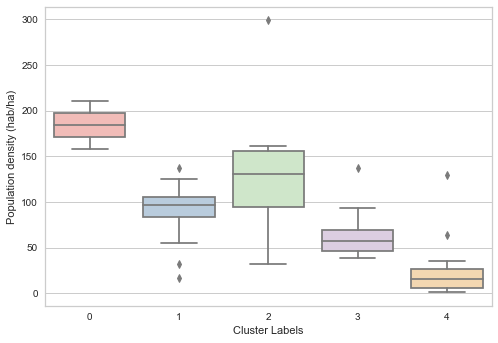

In [86]:
fig = sns.boxplot(
    x='Cluster Labels',
    y='Population density (hab/ha)',
    data=neigh_data_coord_venues_labels_total,
    palette='Pastel1'
).get_figure()
fig.savefig('boxplotdensity.png')

It seems evident from the figure above that Cluster 0, which has only two neighborhoods, is characterized by high population density. On the other hand, Cluster 4, which has 26 neighborhoods, has the characteristic of being the least densely populated.

The other clusters contain neighborhoods with a population density mostly between 50 and 150 hab / ha.

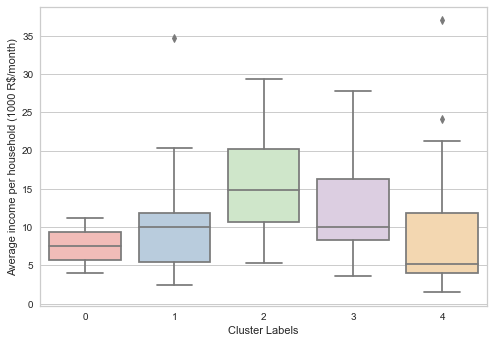

In [87]:
fig = sns.boxplot(
    x='Cluster Labels',
    y='Average income per household (1000 R$/month)',
    data=neigh_data_coord_venues_labels_total,
    palette='Pastel1'
).get_figure()
fig.savefig('boxplotincome.png')

In terms of average income per housing unit, it is clear that there is not a big discrepancy between the clusters regarding the minimum income. However, the median and maximum values are quite different. Clusters 1, 3 and 4 show the greatest discrepancy, with the median values close to the IQR limits.

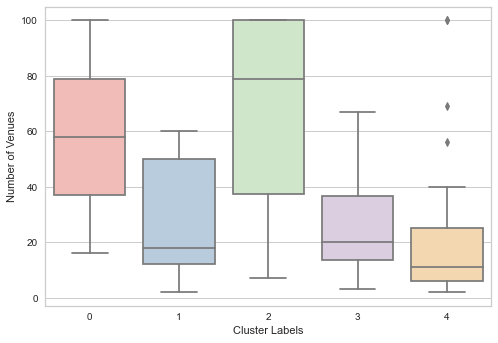

In [88]:
fig = sns.boxplot(
    x='Cluster Labels',
    y='Number of Venues',
    data=neigh_data_coord_venues_labels_total,
    palette='Pastel1'
).get_figure()
fig.savefig('boxplotvenues.png')

By the number of venues, 75% of the neighborhoods contained in cluster 4 have less than 25 venues. In cluster 2, 75% of the neighborhoods have more than 35 venues.

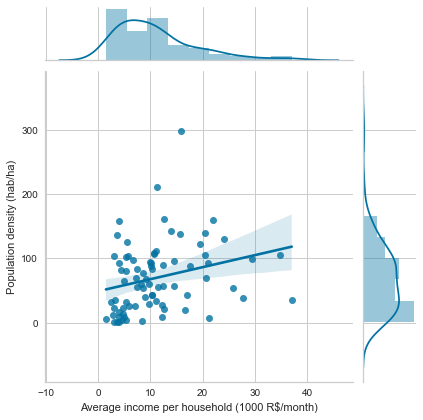

In [89]:
sns.jointplot(x='Average income per household (1000 R$/month)',
              y='Population density (hab/ha)',
              data=neigh_data_coord_venues_labels_total,
              kind='reg')

### Cluster 0 Analysis

In [90]:
cluster_0 = neigh_data_coord_venues_labels_total[neigh_data_coord_venues_labels_total['Cluster Labels']==0]

In [91]:
cluster_0

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
9,0,BOM JESUS,157.7,3.97,-30.042721,-51.162663,Music Venue,Pharmacy,Brazilian Restaurant,Restaurant,Buffet,Supermarket,Bus Stop,Steakhouse,Pizza Place,Betting Shop,16
17,0,CIDADE BAIXA,210.6,11.20,-30.040240,-51.221868,Bar,Pub,Pizza Place,Gym / Fitness Center,Café,Hostel,Burger Joint,Gastropub,Nightclub,South American Restaurant,100


### Cluster 1 Analysis

In [92]:
cluster_1 = neigh_data_coord_venues_labels_total[neigh_data_coord_venues_labels_total['Cluster Labels']==1]

In [93]:
cluster_1

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
4,1,AZENHA,106.7,10.73,-30.050721,-51.215607,Café,Brazilian Restaurant,Gym / Fitness Center,Women's Store,Motel,Bakery,Dance Studio,Theater,Art Gallery,Restaurant,46
5,1,BELA VISTA,104.6,34.68,-30.035317,-51.190351,Gym / Fitness Center,Plaza,Pharmacy,Sushi Restaurant,Bakery,Health Food Store,Grocery Store,Pet Store,Café,Shoe Store,56
11,1,CAMAQUÃ,97.0,6.65,-30.109154,-51.238226,Food & Drink Shop,Pet Store,Pizza Place,Burger Joint,Gym / Fitness Center,Bakery,Market,Bagel Shop,Soccer Field,Fried Chicken Joint,21
18,1,CORONEL APARÍCIO BORGES,82.0,4.33,-30.069073,-51.183070,Burger Joint,Hotel,Rental Service,Music Venue,Brazilian Restaurant,Pharmacy,Deli / Bodega,Snack Place,Restaurant,Event Space,10
19,1,CRISTAL,78.0,8.53,-30.089507,-51.239476,Gym / Fitness Center,Chinese Restaurant,Bus Stop,Bakery,Gymnastics Gym,Australian Restaurant,Athletics & Sports,Grocery Store,Brazilian Restaurant,Food,11
20,1,CRISTO REDENTOR,108.8,10.61,-30.014702,-51.156301,Restaurant,Brazilian Restaurant,Gym / Fitness Center,Fast Food Restaurant,Mobile Phone Shop,Hot Dog Joint,Italian Restaurant,Steakhouse,Fried Chicken Joint,Food Court,60
22,1,FARRAPOS,103.1,3.00,-29.983874,-51.195554,Plaza,Gym / Fitness Center,Soccer Field,Bakery,Market,Hot Dog Joint,Racetrack,Park,Farmers Market,Falafel Restaurant,15
24,1,FLORESTA,89.5,12.39,-30.015092,-51.209666,Soccer Field,Arts & Crafts Store,Motel,Bus Station,Bar,Café,Bakery,Liquor Store,Recording Studio,Record Shop,16
25,1,GLÓRIA,83.9,10.37,-30.076322,-51.196806,Soccer Field,Supermarket,Restaurant,Gymnastics Gym,Gift Shop,Bus Station,Sandwich Place,Diner,Athletics & Sports,Churrascaria,17
27,1,HIGIENÓPOLIS,88.3,17.53,-30.013821,-51.182270,Restaurant,Pet Store,Brazilian Restaurant,Wine Shop,Arts & Entertainment,Furniture / Home Store,Bus Stop,Salon / Barbershop,Grocery Store,Gym / Fitness Center,18


In [94]:
cluster_1_1st = cluster_1.groupby(by='1st Most Common Venue',axis=0).count()

[Text(0, 0, 'Café'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Food & Drink Shop'),
 Text(0, 0, 'Burger Joint'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Soccer Field'),
 Text(0, 0, 'Market'),
 Text(0, 0, 'Pharmacy'),
 Text(0, 0, 'Shoe Store'),
 Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Bus Stop'),
 Text(0, 0, 'Bar')]

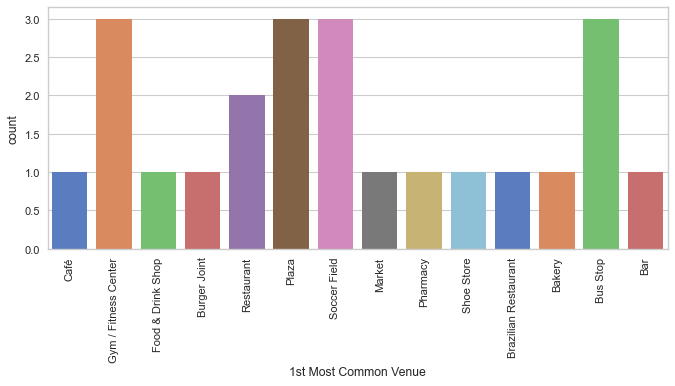

In [95]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='1st Most Common Venue',data=cluster_1,palette='muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Pet Store'),
 Text(0, 0, 'Hotel'),
 Text(0, 0, 'Chinese Restaurant'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Arts & Crafts Store'),
 Text(0, 0, 'Supermarket'),
 Text(0, 0, 'Bus Station'),
 Text(0, 0, 'Campground'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Cosmetics Shop'),
 Text(0, 0, 'IT Services'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Music Venue'),
 Text(0, 0, 'Snack Place')]

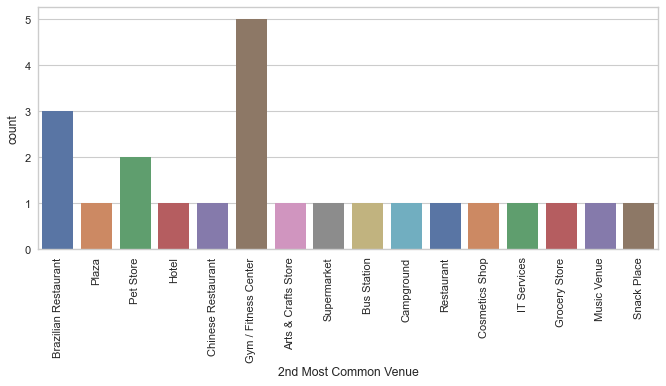

In [96]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='2nd Most Common Venue',data=cluster_1,palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Of the 23 neighborhoods in cluster 1, 8 have gyms as the first or second most numerous venue. Cluster 1 is also marked by plazas, soccer fields and bus stops.

### Cluster 2 Analysis

In [97]:
cluster_2 = neigh_data_coord_venues_labels_total[neigh_data_coord_venues_labels_total['Cluster Labels']==2]

In [98]:
cluster_2

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
3,2,AUXILIADORA,121.8,19.57,-30.020011,-51.190588,Gym / Fitness Center,Pizza Place,Restaurant,Café,Bar,Bakery,Southern Brazilian Restaurant,Pet Store,Pastelaria,Pharmacy,91
10,2,BOM FIM,298.7,15.80,-30.033397,-51.211720,Café,Bakery,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Buffet,Italian Restaurant,Farmers Market,Deli / Bodega,Restaurant,Supplement Shop,100
15,2,CENTRO,161.7,12.61,-30.032503,-51.230329,Café,Gym / Fitness Center,Buffet,Brazilian Restaurant,Bar,Art Museum,Coffee Shop,Clothing Store,Theater,Sporting Goods Shop,100
30,2,INDEPENDÊNCIA,160.2,21.98,-30.027810,-51.211949,Brazilian Restaurant,Café,Clothing Store,Restaurant,Hotel,Pizza Place,Recording Studio,Gym / Fitness Center,Deli / Bodega,Bakery,100
44,2,MEDIANEIRA,88.8,10.10,-30.065397,-51.208676,Gym / Fitness Center,Pizza Place,Snack Place,Martial Arts School,Bus Station,Bus Stop,Steakhouse,Paintball Field,Grocery Store,Paper / Office Supplies Store,21
46,2,MOINHOS DE VENTO,98.4,29.33,-30.024069,-51.205423,Café,Ice Cream Shop,Italian Restaurant,Gastropub,Clothing Store,Spa,Pizza Place,Shoe Store,Gym / Fitness Center,Salon / Barbershop,100
57,2,RIO BRANCO,140.2,20.50,-30.034830,-51.200696,Gym / Fitness Center,Bar,Martial Arts School,Brazilian Restaurant,Italian Restaurant,Café,Bistro,Dessert Shop,Chinese Restaurant,BBQ Joint,67
62,2,SANTANA,142.4,13.93,-30.048879,-51.204799,Churrascaria,Bakery,Restaurant,Gym / Fitness Center,Soccer Field,Pharmacy,Pizza Place,Food Truck,Snack Place,Brazilian Restaurant,48
67,2,SÃO SEBASTIÃO,92.4,10.12,-30.004839,-51.143821,Burger Joint,Fast Food Restaurant,Restaurant,Yoga Studio,Cosmetics Shop,Board Shop,Soccer Field,Brazilian Restaurant,Shopping Mall,Clothing Store,34
77,2,VILA NOVA,32.1,5.35,-30.116003,-51.207517,Burger Joint,Convenience Store,Café,Gymnastics Gym,Garden,Pharmacy,Farmers Market,Event Space,Falafel Restaurant,Farm,7


[Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Café'),
 Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'Churrascaria'),
 Text(0, 0, 'Burger Joint')]

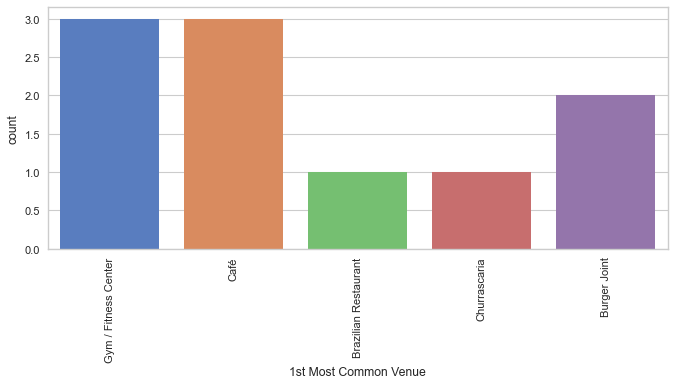

In [99]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='1st Most Common Venue',data=cluster_2,palette='muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Pizza Place'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Café'),
 Text(0, 0, 'Ice Cream Shop'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Fast Food Restaurant'),
 Text(0, 0, 'Convenience Store')]

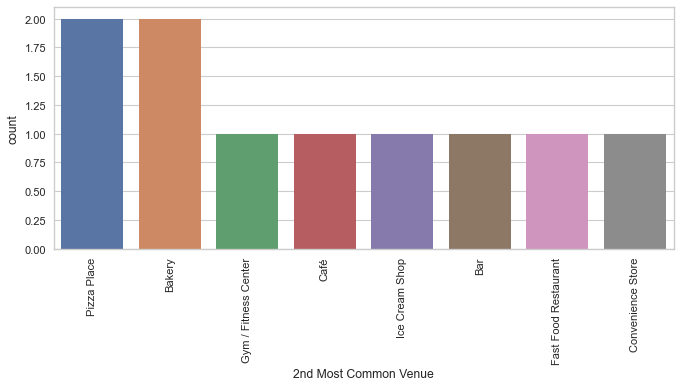

In [100]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='2nd Most Common Venue',data=cluster_2,palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Cluster 3 Analysis

In [101]:
cluster_3 = neigh_data_coord_venues_labels_total[neigh_data_coord_venues_labels_total['Cluster Labels']==3]

In [102]:
cluster_3

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
8,3,BOA VISTA,54.3,25.76,-30.024780,-51.174524,Pharmacy,Bistro,Café,Burger Joint,Furniture / Home Store,Pet Store,Churrascaria,Sandwich Place,Lottery Retailer,Sporting Goods Shop,49
14,3,CAVALHADA,55.6,7.48,-30.104391,-51.226694,Burger Joint,Grocery Store,Supermarket,Gymnastics Gym,Bus Stop,Cosmetics Shop,Soccer Field,Shopping Mall,Big Box Store,Fast Food Restaurant,28
16,3,CHÁCARA DAS PEDRAS,69.0,20.68,-30.034134,-51.162453,Plaza,Gymnastics Gym,Bakery,Gym / Fitness Center,Grocery Store,Snack Place,Food,Farmers Market,School,Doctor's Office,19
31,3,IPANEMA,42.4,16.94,-30.139085,-51.224370,Bar,Food Truck,Clothing Store,Fast Food Restaurant,Brazilian Restaurant,Gymnastics Gym,Athletics & Sports,Pharmacy,Coffee Shop,Gastropub,36
32,3,JARDIM BOTÂNICO,56.6,12.32,-30.052974,-51.185073,Brazilian Restaurant,Clothing Store,Gym / Fitness Center,Shoe Store,Ice Cream Shop,Cosmetics Shop,Bookstore,Burger Joint,Bus Stop,Pet Store,67
34,3,JARDIM FLORESTA,59.7,9.78,-30.001575,-51.158131,Soccer Field,Dance Studio,Bus Station,Shop & Service,Supplement Shop,Park,Supermarket,Department Store,Vietnamese Restaurant,Sports Bar,11
35,3,JARDIM ITU-SABARÁ,68.1,9.17,-30.033103,-51.145110,Plaza,Pharmacy,Soccer Field,Music Venue,Bakery,Electronics Store,Pet Store,Grocery Store,Pizza Place,Cupcake Shop,9
36,3,JARDIM LINDÓIA,92.8,20.99,-30.003619,-51.150396,Gym / Fitness Center,Plaza,Grocery Store,Pizza Place,Park,Bistro,Pet Store,Pastelaria,Restaurant,Electronics Store,29
38,3,JARDIM SÃO PEDRO,43.5,10.31,-30.003961,-51.165156,Soccer Field,Brazilian Restaurant,Churrascaria,Sporting Goods Shop,Farmers Market,Bar,Tattoo Parlor,Café,Restaurant,Paintball Field,15
49,3,NONOAI,70.0,7.18,-30.088987,-51.214601,Tennis Court,Veterinarian,Snack Place,Grocery Store,Supermarket,Burger Joint,Fruit & Vegetable Store,Gym / Fitness Center,Nightclub,Arts & Crafts Store,15


[Text(0, 0, 'Pharmacy'),
 Text(0, 0, 'Burger Joint'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'Soccer Field'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Tennis Court'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Market'),
 Text(0, 0, 'Pizza Place')]

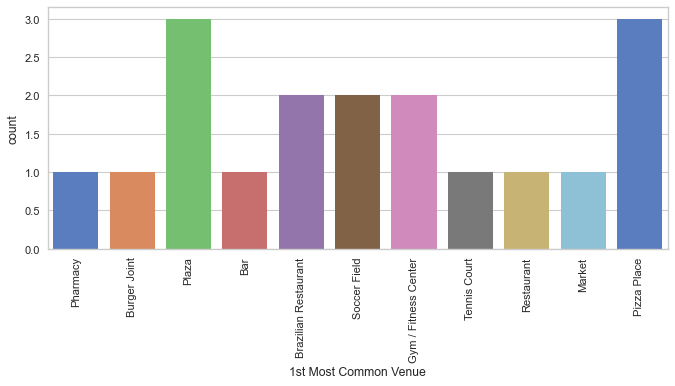

In [103]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='1st Most Common Venue',data=cluster_3,palette='muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Bistro'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Gymnastics Gym'),
 Text(0, 0, 'Food Truck'),
 Text(0, 0, 'Clothing Store'),
 Text(0, 0, 'Dance Studio'),
 Text(0, 0, 'Pharmacy'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'Veterinarian'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Snack Place'),
 Text(0, 0, 'Burger Joint'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'Churrascaria')]

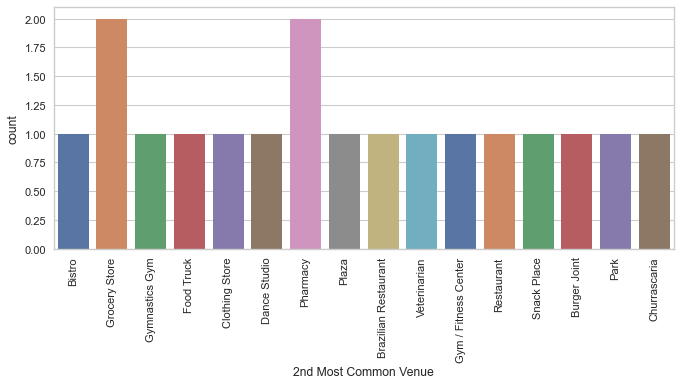

In [104]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='2nd Most Common Venue',data=cluster_3,palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Cluster 4 Analysis

In [105]:
cluster_4 = neigh_data_coord_venues_labels_total[neigh_data_coord_venues_labels_total['Cluster Labels']==4]

In [106]:
cluster_4

,Cluster Labels,Neighborhood,Population density (hab/ha),Average income per household (1000 R$/month),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Number of Venues
0,4,AGRONOMIA,8.6,3.98,-30.069267,-51.149217,Bus Station,Construction & Landscaping,Motel,Pet Service,Bus Stop,Soccer Field,Food & Drink Shop,Food,Flower Shop,Empada House,7
1,4,ANCHIETA,2.4,8.41,-29.972936,-51.173802,Brewery,Soccer Field,Supermarket,Brazilian Restaurant,Flower Shop,Distribution Center,Arts & Crafts Store,Food & Drink Shop,Farm,Farmers Market,8
2,4,ARQUIPÉLAGO,1.1,2.96,-29.992760,-51.226618,Motel,Restaurant,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop,2
6,4,BELÉM NOVO,4.7,4.49,-30.210898,-51.179565,Plaza,Gym / Fitness Center,Restaurant,Snack Place,Soccer Field,Sushi Restaurant,Bar,Bakery,Grocery Store,Ice Cream Shop,11
7,4,BELÉM VELHO,9.1,4.94,-30.115523,-51.179376,Grocery Store,Bus Station,Buffet,Historic Site,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Farm,Farmers Market,Flower Shop,4
12,4,CAMPO NOVO,12.9,4.70,-30.134591,-51.198818,Snack Place,Plaza,Athletics & Sports,Pizza Place,Flower Shop,Furniture / Home Store,Bubble Tea Shop,Bakery,Bus Stop,Tea Room,13
13,4,CASCATA,34.9,3.17,-30.087868,-51.182718,Bakery,Snack Place,Pet Store,Market,Recreation Center,Yoga Studio,Farmers Market,Event Service,Event Space,Falafel Restaurant,6
21,4,ESPÍRITO SANTO,33.0,11.02,-30.150110,-51.221147,Bus Station,Bistro,Gym / Fitness Center,Snack Place,Bakery,Beach,Yoga Studio,Flower Shop,Farm,Farmers Market,6
23,4,FARROUPILHA,19.3,16.66,-30.038293,-51.212846,Café,Bakery,Bar,Brazilian Restaurant,Bistro,Buffet,Arts & Crafts Store,Vegetarian / Vegan Restaurant,Ice Cream Shop,Pie Shop,100
26,4,GUARUJÁ,20.5,12.62,-30.156477,-51.223076,Bus Stop,Convenience Store,Music Venue,Bakery,Brewery,Pet Store,River,Gym / Fitness Center,Park,Beach,11


[Text(0, 0, 'Bus Station'),
 Text(0, 0, 'Brewery'),
 Text(0, 0, 'Motel'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Snack Place'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Café'),
 Text(0, 0, 'Bus Stop'),
 Text(0, 0, 'Pizza Place'),
 Text(0, 0, 'Beach'),
 Text(0, 0, 'Rental Car Location'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Furniture / Home Store'),
 Text(0, 0, 'Pool'),
 Text(0, 0, 'Soccer Field'),
 Text(0, 0, 'Steakhouse'),
 Text(0, 0, 'Brazilian Restaurant')]

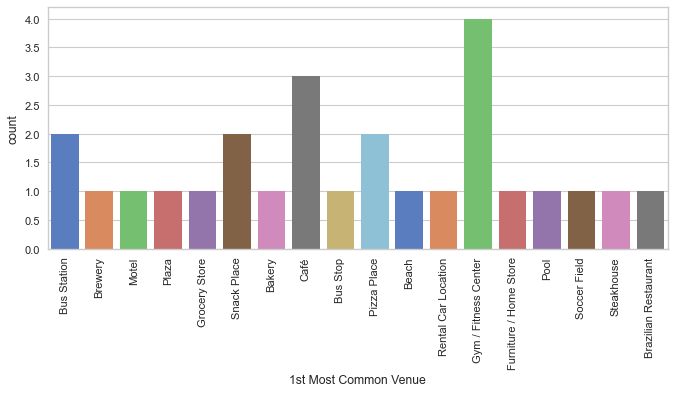

In [107]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='1st Most Common Venue',data=cluster_4,palette='muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Construction & Landscaping'),
 Text(0, 0, 'Soccer Field'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Bus Station'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Snack Place'),
 Text(0, 0, 'Bistro'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Convenience Store'),
 Text(0, 0, 'Brazilian Restaurant'),
 Text(0, 0, 'IT Services'),
 Text(0, 0, 'Pharmacy'),
 Text(0, 0, 'Farm'),
 Text(0, 0, 'Food & Drink Shop'),
 Text(0, 0, 'Pet Store'),
 Text(0, 0, 'Café')]

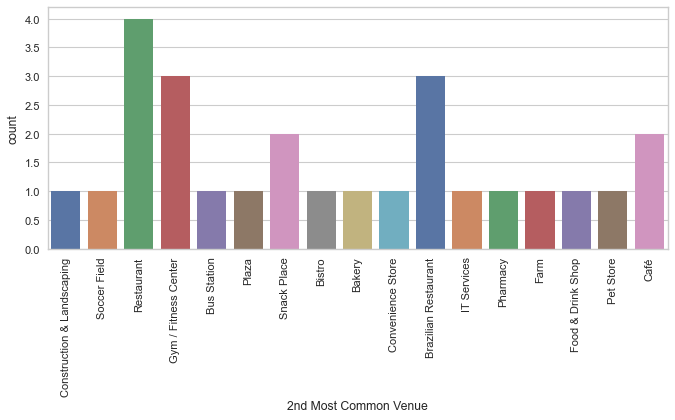

In [108]:
plt.figure(figsize=(10,4),dpi=80)
chart = sns.countplot(x='2nd Most Common Venue',data=cluster_4,palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## 5. Conclusion <a name='conclusion' ></a>

See attached file.